In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import statistics as st
import math

In [2]:
def indicator(data):
    ret_data = []
    for i in range(len(data)):
        calculate_sum = 0
        calculate_count = 0
        for j in range(i - 60, i + 61):
            if 0 <= j < num_row:
                calculate_sum += data[j]
                calculate_count += 1
        ret_data.append(calculate_sum / calculate_count)
    return ret_data

def normalize_weight(w: list):
    return [x / sum(w) for x in w]

def get_proficiency(df):
    proficiencies = []
    w = normalize_weight([1, 1])
    for row, row_data in df.iterrows():
        proficiency = (w[0] * row_data.agent_hp_percentage 
                       + w[1] * (1 - row_data.target_hp_percentage)) / sum(w)
        proficiencies.append(proficiency)
    df['proficiency'] = proficiencies
    return st.mean(proficiencies)

def get_path(file_name):
    directory = 'ftg-data/General/'
    return directory + file_name

In [3]:
file_name = 'BlackMamba vs MctsAi.csv'
df = pd.read_csv(get_path(file_name))
proficiency = get_proficiency(df)
proficiency

0.6990244886975242

In [4]:
sub_df = pd.concat([df.iloc[0:,:20], df.iloc[0:,-1]], axis=1)
sub_df

,remaining_frame,distance,agent_hp_percentage,agent_energy_percentage,agent_facing,agent_has_control,agent_hit_confirm,agent_is_air,agent_is_crouch,agent_is_down,...,target_hp_percentage,target_energy_percentage,target_facing,target_has_control,target_hit_confirm,target_is_air,target_is_crouch,target_is_down,target_is_guard,proficiency
0,1.000000,0.416025,1.0000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,...,1.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50000
1,0.999722,0.416025,1.0000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,...,1.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50000
2,0.999444,0.416025,1.0000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,...,1.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50000
3,0.999167,0.416025,1.0000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,...,1.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50000
4,0.998889,0.416025,1.0000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,...,1.000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,0.743333,0.048536,0.9375,0.176667,1.0,0.0,0.0,1.0,1.0,0.0,...,0.035,0.100000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.95125
925,0.743056,0.048536,0.9375,0.176667,1.0,0.0,0.0,1.0,1.0,0.0,...,0.035,0.100000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.95125
926,0.742778,0.048536,0.9375,0.176667,1.0,0.0,0.0,1.0,1.0,0.0,...,0.035,0.100000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.95125
927,0.742500,0.048536,0.9375,0.176667,1.0,0.0,0.0,1.0,1.0,0.0,...,0.035,0.100000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.95125


In [5]:
num_row = len(sub_df)
spacing = 150
x = range(num_row)
x_min, x_max = 0, num_row
y_min, y_max = 0, 1
interval = range(0, num_row, 200 * math.ceil(num_row / 3600))

array([<AxesSubplot:title={'center':'Proficiency'}>,
       <AxesSubplot:title={'center':'Hit Point'}>], dtype=object)

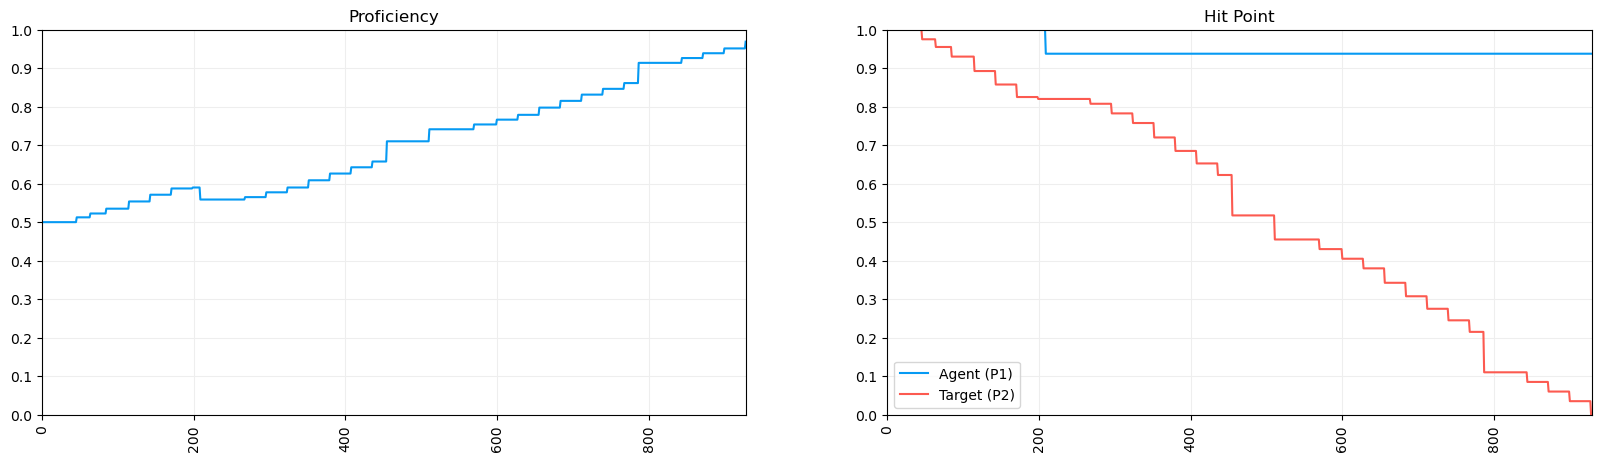

In [6]:
mpl.style.use('default')
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for ax in fig.get_axes():
    ax.grid(which='both', color='#eeeeee')
    #ax.set_xlabel('Frame Number')
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xticks(interval)
    ax.set_xticklabels(interval, rotation=90, ha='center')
    ax.set_yticks([x / 10 for x in range(11)])
# Distance
#ax.set_title('Hit Point', fontsize=14)
#ax.tick_params(axis='both', which='major', labelsize=10)
axs[0].set_title('Distance')
axs[0].plot(x, sub_df.distance, color='xkcd:azure')
# Hit Point
axs[1].set_title('Hit Point')
axs[1].plot(x, sub_df.agent_hp_percentage, color='xkcd:azure', label='Agent (P1)')
axs[1].plot(x, sub_df.target_hp_percentage, color='xkcd:coral', label='Target (P2)')
#ax.legend(loc=1, prop={'size': 10})
axs[1].legend()
axs

In [7]:
sub_df = df.iloc[0:,20:-3]
sub_df

,neutral,stand,forward_walk,dash,back_step,crouch,jump,for_jump,back_jump,air,...,stand_f_d_dfb,stand_d_db_ba,stand_d_db_bb,air_d_df_fa,air_d_df_fb,air_f_d_dfa,air_f_d_dfb,air_d_db_ba,air_d_db_bb,stand_d_df_fc
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,...,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278,0.000278
2,0.000556,0.000278,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556
3,0.000833,0.000278,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,...,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
4,0.001111,0.000278,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,...,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,0.256667,0.002222,0.003611,0.154444,0.026111,0.004444,0.256667,0.246944,0.256667,0.245833,...,0.032778,0.256667,0.100278,0.256667,0.256667,0.256667,0.256667,0.256667,0.256667,0.256667
925,0.256944,0.002500,0.003889,0.154722,0.026389,0.004722,0.256944,0.247222,0.256944,0.246111,...,0.033056,0.256944,0.100556,0.256944,0.256944,0.256944,0.256944,0.256944,0.256944,0.256944
926,0.257222,0.002778,0.004167,0.155000,0.026667,0.005000,0.257222,0.247500,0.257222,0.246389,...,0.033333,0.257222,0.100833,0.257222,0.257222,0.257222,0.257222,0.257222,0.257222,0.257222
927,0.257500,0.003056,0.004444,0.155278,0.026944,0.005278,0.257500,0.247778,0.257500,0.246667,...,0.033611,0.257500,0.101111,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500,0.257500


<AxesSubplot:>

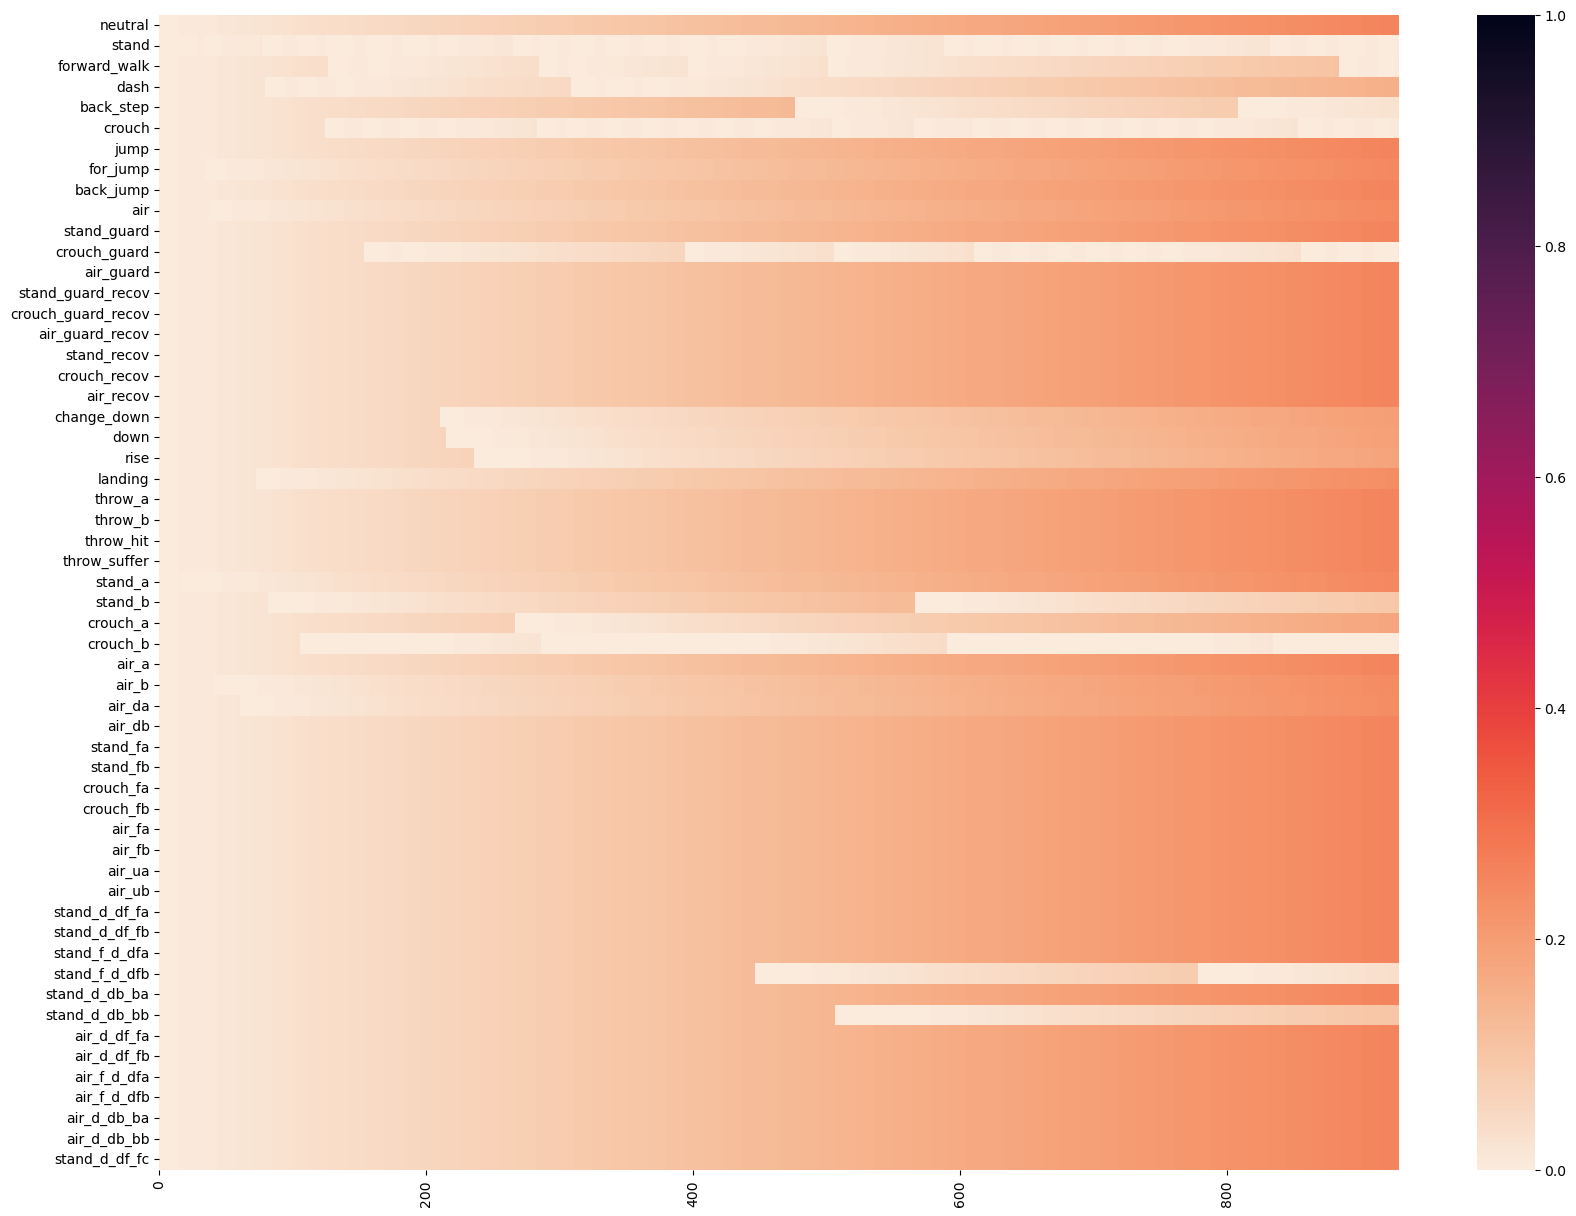

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(sub_df.transpose(), cmap=sns.color_palette("rocket_r", as_cmap=True), vmin=0, vmax=1)
ax.set_xticks(interval)
ax.set_xticklabels(interval)
ax.tick_params(axis='both', which='major', labelsize=10)
ax